<a href="https://colab.research.google.com/github/greenmetro/FarmHelper/blob/master/efficientNet_plant_disease_dection_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Tony607/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 171 (delta 98), reused 161 (delta 93), pack-reused 0
Receiving objects: 100% (171/171), 5.44 MiB | 13.24 MiB/s, done.
Resolving deltas: 100% (98/98), done.
/content/efficientnet_keras_transfer_learning


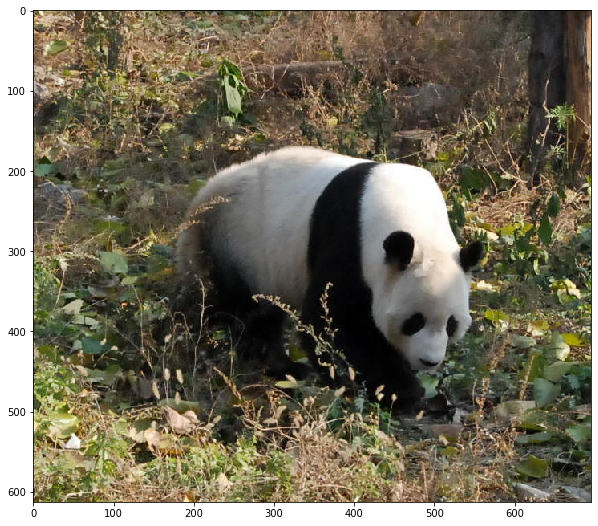

In [10]:
import os
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
sys.path.append('..')

from tensorflow.python.keras.applications.imagenet_utils import decode_predictions
# Options: EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
# Higher the number, the more complex the model is.
from efficientnet import EfficientNetB0 as Net
from efficientnet import center_crop_and_resize, preprocess_input
image = imread('/content/efficientnet_keras_transfer_learning/misc/panda.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [0]:
# loading pretrained model
model = Net(weights='imagenet')

In [12]:
# preprocess input
image_size = model.input_shape[1]
x = center_crop_and_resize(image, image_size=image_size)
x = preprocess_input(x)
x = np.expand_dims(x, 0)

# make prediction and decode
y = model.predict(x)
decode_predictions(y)

40960/35363 [==================================] - 0s 0us/step


[[('n02510455', 'giant_panda', 0.8347933),
  ('n02134084', 'ice_bear', 0.015601942),
  ('n02509815', 'lesser_panda', 0.0045534894),
  ('n02133161', 'American_black_bear', 0.0024718957),
  ('n02132136', 'brown_bear', 0.002070749)]]

In [13]:
model.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_130 (Conv2D)             (None, 112, 112, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_98 (BatchNo (None, 112, 112, 32) 128         conv2d_130[0][0]                 
__________________________________________________________________________________________________
swish_98 (Swish)                (None, 112, 112, 32) 0           batch_normalization_98[0][0]     
____________________________________________________________________________________

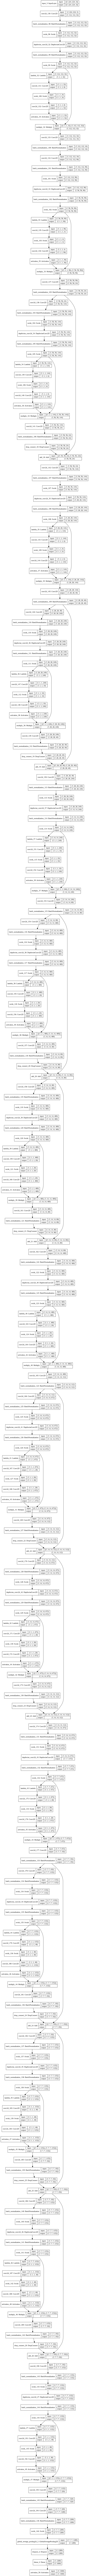

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png')

In [0]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

data = model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')
with open('model.svg', 'wb') as f:
    f.write(data)